In [1]:
# from odbAccess import *
# import sys

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [7]:
df = pd.read_csv('../out/ie.csv', delimiter=' ',escapechar="#")
# df

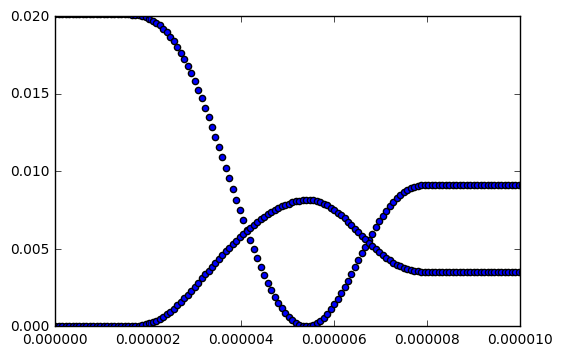

In [14]:
t = df['t']
ball_ke = df['ball_ke']
plate_ie = df['plate_ie']
coating_ie = df['coating_ie']

plt.xlim(0,1e-5)
plt.ylim(0,0.02)
plt.scatter(t,ball_ke)
plt.scatter(t,coating_ie)

In [70]:
import subprocess, os
os.chdir("/home/matt/PhD/abaqus/6.13-4/analysis")
# reimplementation of run-analysis.sh here:


In [74]:
# rootdir = 'coating-plastic-kinematic-rough-high-2.odb'
rootdir = 'coating-plastic-penalty-slip-low.odb'
outfile = 'out/energyBalance-slip-low.out'
my_env = os.environ.copy()
my_env["PATH"] = "/home/matt/install/ABAQUS-6.13.4/scratch/6.13-4/code/bin:" + my_env["PATH"]
my_env["ROOTODB"] = '/home/matt/PhD/abaqus/6.13-4/' + rootdir
my_env["OUTPATH"] = '/home/matt/PhD/abaqus/6.13-4/analysis/' + outfile
bashCommand = 'abaqus viewer noGUI=/home/matt/PhD/abaqus/6.13-4/analysis/process_energy.py' 
output = subprocess.run(['bash','-c', bashCommand], env=my_env, stdout=subprocess.PIPE)
output

CompletedProcess(args=['bash', '-c', 'abaqus viewer noGUI=/home/matt/PhD/abaqus/6.13-4/analysis/process_energy.py'], returncode=0, stdout=b'')

In [40]:
# outfile = 'out/energyBalance-test-1.out'

df = pd.read_csv(outfile, delimiter=' ',escapechar="#")
# df

In [60]:
def plot(df):
    t = df['t']
    ball_ke = df['ball_ke']
    plate_ie = df['plate_ie']
    coating_ie = df['coating_ie']
    total = df['coating_ke'] + df['coating_ie'] + df['plate_ie'] + df['plate_ke'] + df['ball_ie'] + df['ball_ke']
    mpl.style.use('default')
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.tick_params(labeltop=True, labelright=True)
    plt.xlim(0,1e-5)
    plt.ylim(0,0.022)
    ax.scatter(t,df['ball_ie'], label='Ball U', s = 2)
    ax.scatter(t,ball_ke, label="Ball kinE", s = 2)
    ax.scatter(t,df['plate_ie'], label="Plate", s = 2)
    ax.scatter(t,df['coating_ie'] + df['coating_ke'], label="Coating", s = 2)

    ax.scatter(t,total, c='black', label='total', s = 2)
    plt.legend()
    plt.grid(True, "both")
    return plt


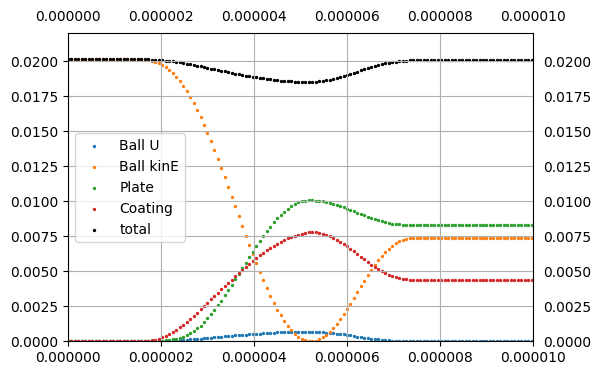

In [52]:
outfile = 'out/energyBalance-test-1.out'
df = pd.read_csv(outfile, delimiter=' ',escapechar="#")
plt = plot(df)

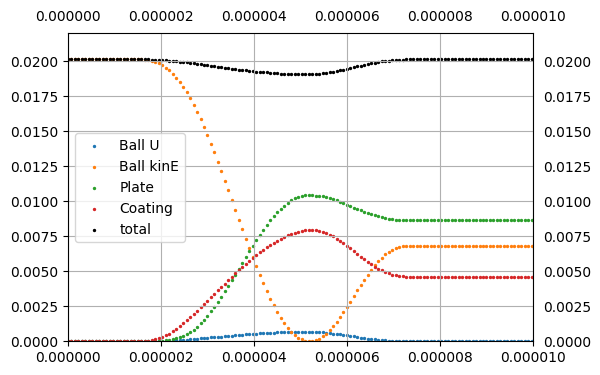

In [53]:
outfile = 'out/energyBalance-high-1.out'
df = pd.read_csv(outfile, delimiter=' ',escapechar="#")
plt = plot(df)

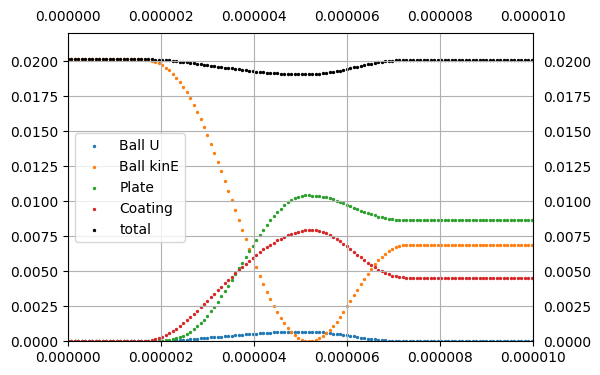

In [68]:
outfile = 'out/energyBalance-high-2.out'
df = pd.read_csv(outfile, delimiter=' ',escapechar="#")
plt = plot(df)

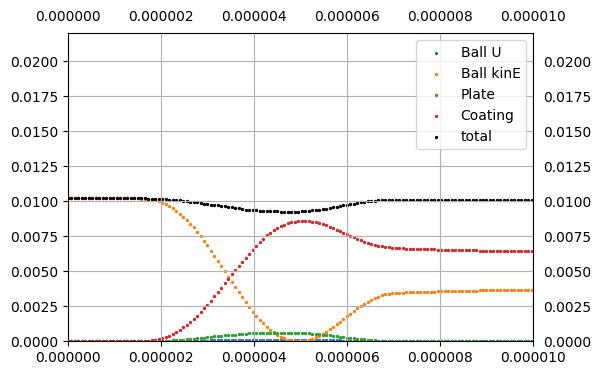

In [73]:
outfile = 'out/energyBalance-slip-low.out'
df = pd.read_csv(outfile, delimiter=' ',escapechar="#")
plt = plot(df)